In [1]:
import matplotlib.pyplot as plt
import matplotlib
import math
from astropy.io import fits
import numpy as np
import pandas as pd 
# import cv2
import skimage as sk
import scipy.ndimage as nd
from functions_CONNIE import *

# from ROOT import *

def gaussian(x, a, mean, sigma):
    return a * np.exp(-((x - mean)**2 / (2 * sigma**2)))

# def Gaussian2(x,m1,s1,g1,a1, m2, s2, g2, a2): #data, mean, sigma, gain, height1, heigth2
#     return a1*np.exp(-1/2*((x-m1-g1)/s1)**2) + a2*np.exp(-1/2*((x-m2-g2)/s2)**2)

def Gaussian2(x,m,s,g,a1,a2): #data, mean, sigma, gain, height1, heigth2
    return a1*np.exp(-1/2*((x-m)/s)**2)+a2*np.exp(-1/2*((x-m-g)/s)**2)

Welcome to JupyROOT 6.28/04


In [2]:
plt.rcParams.update({
    "image.origin": "lower",
    "image.aspect": 1,
    #"text.usetex": True,
    "grid.alpha": .5,
    "axes.linewidth": 3,
    "lines.linewidth" : 1,
    "font.size":    15.0,
    "xaxis.labellocation": 'right',  # alignment of the xaxis label: {left, right, center}
    "yaxis.labellocation": 'top',  # alignment of the yaxis label: {bottom, top, center}
    "xtick.top":           True ,  # draw ticks on the top side
    "xtick.major.size":    8    ,# major tick size in points
    "xtick.minor.size":    4      ,# minor tick size in points
    "xtick.direction":     'in',
    "xtick.minor.visible": True,
    "ytick.right":           True ,  # draw ticks on the top side
    "ytick.major.size":    8    ,# major tick size in points
    "ytick.minor.size":    4      ,# minor tick size in points
    "ytick.direction":     'in',
    "ytick.minor.visible": True,
    "ytick.major.width":   2   , # major tick width in points
    "ytick.minor.width":   1 ,
    "xtick.major.width":   2   , # major tick width in points
    "xtick.minor.width":   1 ,
    "legend.framealpha": 0 ,
    "legend.loc": 'best',

})

Colormap = 'jet'
ColorMap = Colormap
Norm = mpl.colors.LogNorm(vmin=10**-1, vmax=7 * 10**0)

Filename: ../../images/CONNIE/RUNID_116/cal_11_2_v2_proc_runID116_skp_NSAMP400_EXP0_img1_2522.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     173   (420, 1022)   float32   
None
----------------


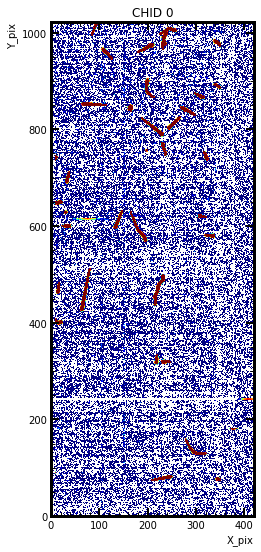

In [3]:
path = '../../images/CONNIE/RUNID_116/cal_11_2_v2_proc_runID116_skp_NSAMP400_EXP0_img1_2522.fits'


hdu_list = fits.open(path)
print(hdu_list.info())
print('----------------')
hdu_list[0].header
plt.figure(figsize=(20,20))
# for i in range(4):
plt.subplot(2,2,1)
# plt.imshow(hdu_list[0].data-np.median(hdu_list[0].data),vmin=0,vmax=1, cmap = Colormap)
plt.imshow(hdu_list[0].data-np.median(hdu_list[0].data), cmap = Colormap, norm=Norm)
plt.title('CHID '+str(0))
plt.ylabel('Y_pix')
plt.xlabel('X_pix')
plt.show()

In [4]:
path.split('/')[-1].split('_')[-2].split('g')[-1]

'1'

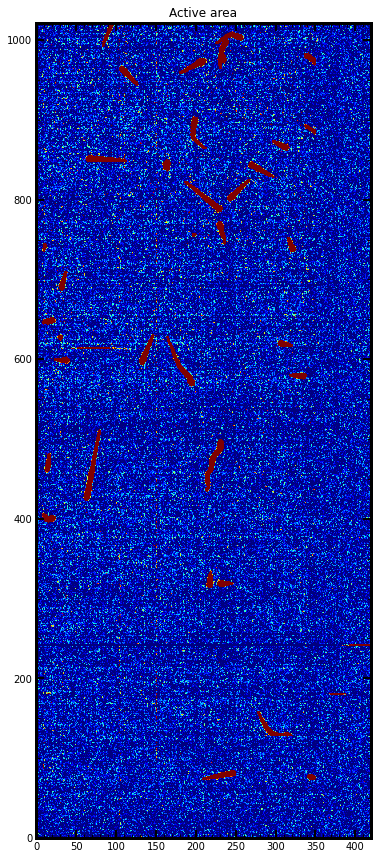

In [4]:
# Overscan = hdu_list[0].data[:, 350:]
# active_area = hdu_list[0].data[:600, :]
active_area = hdu_list[0].data[:, :]

header = hdu_list[0].header


fig, axs = plt.subplots(1,1, figsize=[10,15])
# oScan_mask=sk.measure.label(Overscan>=np.max(Overscan) , connectivity=2)
# oScan=ma.masked_array(Overscan,mask=(oScan_mask>0))
# axs.imshow(active_area[:, :30], origin='lower', vmin = 0, vmax = 0.5,  cmap = Colormap)
axs.imshow(active_area[:, :], origin='lower', vmin = 0, vmax = 0.5,  cmap = Colormap)
# axs.imshow(active_area, origin='lower',  cmap = Colormap, norm = Norm)
axs.set_title('Active area')

# axs[1].imshow(Overscan, origin='lower', vmin = 0, vmax = 1)
# axs[1].set_title('OverScan')

# fig.colorbar()
# plt.show()

# fig, axs = plt.subplots(figsize=[10,10])
# active_area_mask=sk.measure.label(active_area>=np.max(active_area), connectivity=2)
# active_area_true=ma.masked_array(active_area,mask=(active_area_mask>0))
# plt.colorbar(location = 'bottom')
# plt.colorbar()

# fig.colorbar(x1, ax=axs[0])
# fig.colorbar(x2, ax=axs[1])

plt.show()


In [6]:
header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  420                                                  
NAXIS2  =                 1022                                                  
CCDNCOL = '682     '           / Smart sequencer variable                       
CCDNPRES= '7       '           / Smart sequencer variable                       
CCDNROW = '1022    '           / Smart sequencer variable                       
EXPOSURE= '0       '           / Smart sequencer variable                       
NBINCOL = '1       '           / Smart sequencer variable                       
NBINROW = '1       '           / Smart sequencer variable                       
NCOL    = '420     '           / Smart sequencer variable                       
NROW    = '1022    '        

## Creación del DataFrame

In [7]:
sigma_eletrons = header['RD_NOISE']
min_energy_for_label = 3 * sigma_eletrons
label_img, nlabels_img = sk.measure.label(active_area > min_energy_for_label, connectivity=2, return_num=True)
prop = sk.measure.regionprops(label_img, active_area)

# plt.imshow(label_img == nlabels_img, vmin=0, vmax=1)
TotalDataFrame = event_DataFrame(dataCal=active_area, label_img=label_img, nlabels_img =nlabels_img, 
                                    prop=prop, header=header, extension=1, unidades = 2)


list_indexs = []
range_matrixsize = TotalDataFrame[TotalDataFrame['Event Size (px)'].between(3, 6)]
range_energy = range_matrixsize[range_matrixsize['Total Charge (KeV)'].between(1, 10)]
for index in range_energy.index:
    # print(index)
    list_indexs.append(index)
print('Nclusters: ', len(list_indexs))
print('Index: ', list_indexs)
display(range_energy.head(100))

Events: 2663
Nclusters:  30
Index:  [2, 20, 121, 131, 138, 150, 175, 254, 283, 291, 326, 456, 475, 481, 688, 1139, 1179, 1190, 1194, 1385, 1405, 1557, 1729, 1750, 1760, 1910, 1986, 2012, 2154, 2187]


,Image ID,Extension,Matrix Size (px),Event Size (px),Total Charge (KeV),Mean Charge (KeV),Barycenter (px)
Event ID,,,,,,,
2,2522,1,1x3,3,3.890291,1.297,"[0.0, 1.0]"
20,2522,1,2x4,5,3.013694,0.603,"[0.2, 1.2]"
121,2522,1,1x5,5,4.078529,0.816,"[0.0, 2.0]"
131,2522,1,1x5,5,2.898288,0.580,"[0.0, 2.0]"
138,2522,1,1x6,6,4.388115,0.731,"[0.0, 2.5]"
150,2522,1,1x3,3,3.061453,1.020,"[0.0, 1.0]"
175,2522,1,1x3,3,1.745816,0.582,"[0.0, 1.0]"
254,2522,1,1x3,3,4.597136,1.532,"[0.0, 1.0]"
283,2522,1,4x1,4,5.317271,1.329,"[1.5, 0.0]"


## Visualizar un cluster y su información

,Image ID,Extension,Matrix Size (px),Event Size (px),Total Charge (KeV),Mean Charge (KeV),Barycenter (px)
Event ID,,,,,,,
2663,2522,1,1x1,1,1.006059,1.006,"[0.0, 0.0]"


420
Event Slice:
x: [0,420]
y: [0,1022]


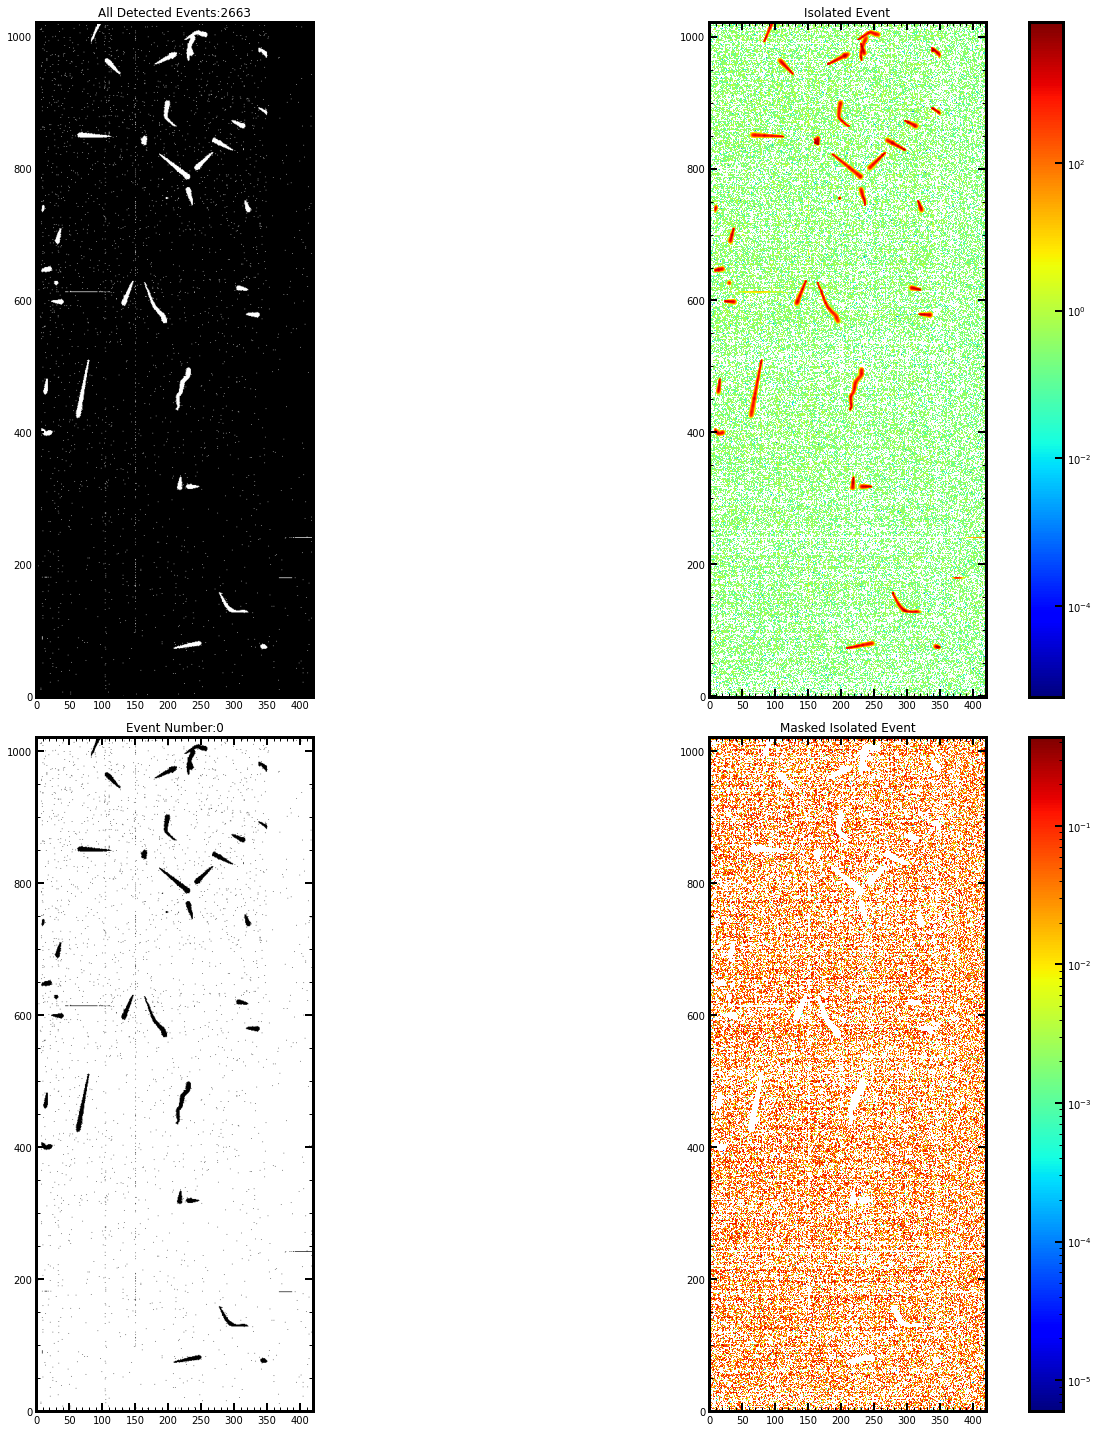

In [59]:
n_label = 0
extra = 0


label, n_events = nd.label(active_area > min_energy_for_label,structure=[[1,1,1],[1,1,1],[1,1,1]])
loc = nd.find_objects(label==n_label)[0]

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=[20,20])
# fig.subplots_adjust(left=0.1, bottom=0.1, right=0.5, top=0.9)
# fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9)

display(TotalDataFrame.iloc[[n_label-1]])


# fig.suptitle('Event Number '+ str(n_label))
## Imagen original
axs[0,0].set_title('All Detected Events:'+str(n_events))
axs[0,0].imshow(label==0, cmap='gist_yarg', vmax=1, vmin=0, origin='lower')
# plt.suptitle('Primer Imagen')

## Evento en la imagen original
axs[1,0].set_title('Event Number:'+str(n_label))
axs[1,0].imshow(label==n_label, cmap='gray', vmax=1,vmin=0, origin='lower')


axs[0,1].set_title('Isolated Event')
x1 = axs[0,1].imshow(active_area[loc[0].start-extra:loc[0].stop+extra, loc[1].start-extra:loc[1].stop+extra], cmap= Colormap, norm=matplotlib.colors.LogNorm())#, origin = 'lower')
# plt.colorbar()

mask_35 = np.invert(label==n_label)


data_mask = ma.masked_array(active_area[loc[0].start-extra:loc[0].stop+extra, loc[1].start-extra:loc[1].stop+extra], mask_35[loc[0].start-extra:loc[0].stop+extra, loc[1].start-extra:loc[1].stop+extra])
print(len(data_mask[0]))

axs[1,1].set_title('Masked Isolated Event')
x2 = axs[1,1].imshow(data_mask, cmap= Colormap, norm=matplotlib.colors.LogNorm())#, origin='lower')
# axs[1,1].plot(totalFrame.iat[n_label-1, 7][0], totalFrame.iat[n_label-1, 7][1], 'ro') ## Plot the baricentrum
# print('n_label:', n_label)
# plt.legend('Baricentrum')

fig.colorbar(x1, ax=axs[0,1])
fig.colorbar(x2, ax=axs[1,1])
# fig.colorbar(axs[1,1], ax=[[x1,x2]], location = 'bottom', fraction = .1)

print('Event Slice:'  )
print('x: ['+str(loc[1].start)+','+str(loc[1].stop)+']')
print('y: ['+str(loc[0].start)+','+str(loc[0].stop)+']')
# print(loc)
# print(totalFrame.set_index('Event ID').iloc[[n_label-1]])
plt.tight_layout()
plt.show()


### Con faldas

3
Event Slice:
x: [179,180]
y: [40,41]


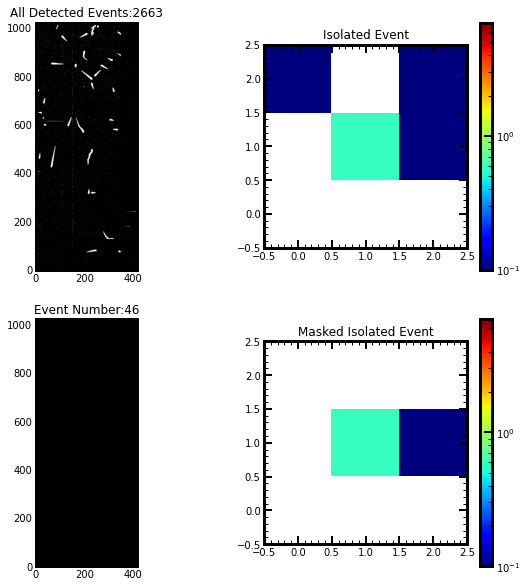

,Image ID,Extension,Matrix Size (px),Event Size (px),Total Charge (KeV),Mean Charge (KeV),Barycenter (px)
Event ID,,,,,,,
46,2522,1,1x1,1,0.588881,0.589,"[0.0, 0.0]"


In [43]:
n_label = 46
n_skirts = 1
extra = 1


label, n_events = nd.label(active_area > min_energy_for_label,structure=[[1,1,1],[1,1,1],[1,1,1]]) # 48
# label, n_events = nd.label(dataCal>6*abs(popt[2]),structure=[[0,1,0],[1,1,1],[0,1,0]]) ## 50, 52
loc = nd.find_objects(label==n_label)[0]

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=[10,10])
# fig.subplots_adjust(left=0.1, bottom=0.1, right=0.5, top=0.9)
# fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9)

# fig.suptitle('Event Number '+ str(n_label))
## Imagen original
axs[0,0].set_title('All Detected Events:'+str(n_events))
axs[0,0].imshow(label==0, cmap='gist_yarg', vmax=1, vmin=0, origin='lower')
# plt.suptitle('Primer Imagen')

## Evento en la imagen original
axs[1,0].set_title('Event Number:'+str(n_label))
axs[1,0].imshow(label==n_label, cmap='gray', vmax=1,vmin=0, origin='lower')


axs[0,1].set_title('Isolated Event')
x1 = axs[0,1].imshow(active_area[loc[0].start-extra:loc[0].stop+extra, loc[1].start-extra:loc[1].stop+extra], cmap= ColorMap, norm = Norm)#, origin = 'lower')
# plt.colorbar()

### Skirts ###
mask_35 = np.invert(nd.binary_dilation(label==n_label, iterations= n_skirts))
# mask_35 = np.invert(label==n_label)
# skirt = nd.binary_dilation(mask_35, structure=[[0,0,0],[0,1,0],[0,0,0]], iterations = 2)
# print(skirt)


data_mask = ma.masked_array(active_area[loc[0].start-extra:loc[0].stop+extra, loc[1].start-extra:loc[1].stop+extra], mask_35[loc[0].start-extra:loc[0].stop+extra, loc[1].start-extra:loc[1].stop+extra])
print(len(data_mask[0]))

axs[1,1].set_title('Masked Isolated Event')
x2 = axs[1,1].imshow(data_mask, cmap= ColorMap, norm=Norm)#, origin='lower')
# axs[1,1].plot(totalFrame.iat[n_label-1, 7][0], totalFrame.iat[n_label-1, 7][1], 'ro') ## Plot the baricentrum
# print('n_label:', n_label)
# plt.legend('Baricentrum')

fig.colorbar(x1, ax=axs[0,1])
fig.colorbar(x2, ax=axs[1,1])
# fig.colorbar(axs[1,1], ax=[[x1,x2]], location = 'bottom', fraction = .1)

print('Event Slice:'  )
print('x: ['+str(loc[1].start)+','+str(loc[1].stop)+']')
print('y: ['+str(loc[0].start)+','+str(loc[0].stop)+']')
# print(loc)
# print(totalFrame.set_index('Event ID').iloc[[n_label-1]])
plt.show()


TotalDataFrame.iloc[[n_label-1]]